In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [6]:
y = df['salario']
x = df.drop(['salario', 'noasiat', 'postgrad' ], axis = 1)
x

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [7]:
reg_lin = sm.OLS(y, sm.add_constant(x)).fit()


In [8]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Fri, 08 May 2020   Prob (F-statistic):           7.37e-38
Time:                        23:40:17   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

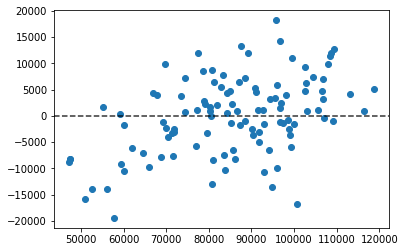

In [9]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(x))
ax.scatter(y, y - y_pred)
plt.axhline(y = 0, color = 'black', alpha = 0.8, linestyle= '--')

## Regresión logisitica

In [10]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [11]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [12]:
y = np.where(df['salario'] > 96000, 1, 0)
x = df.drop(['salario'], axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

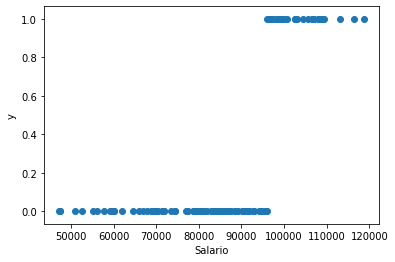

In [13]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('Salario')
ax.set_ylabel('y')

In [14]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(x,y)
y_estimado = reg_log.predict_proba(x)[ :, 1] # la Probabilidad de uno a cero
y_estimado = reg_log.predict(x)

In [15]:
metrics.accuracy_score(y, y_estimado)

0.9090909090909091

In [16]:
y_estimado == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Arboles de decisiones 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus


C:\Users\Fredy Orozco\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [18]:
df = pd.read_csv('rating-peliculas.csv')

In [19]:
df.columns

Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [21]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [22]:
y = df.genero
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [23]:
X = df.drop(['pelicula', 'genero'], axis=1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [52]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = x.columns, 
                class_names = y.value_counts().index)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('pelicula.png')
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: "C:\Users\Fredy" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [50]:
metrics.accuracy_score(y_test, y_pred)
    

0.375